In [15]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from DynLaborFertModel import DynLaborFertModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Initialization
Models are initialized with the same parameters used in lectures for ease of comparison. Each model below only differ in values of $\beta_1$

In [16]:
model01 = DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1':0.01,'theta':1})
par01 = model01.par
sol01 = model01.sol
sim01 = model01.sim

model02 = DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1':0.02,'theta':1})
par02 = model02.par
sol02 = model02.sol
sim02 = model02.sim

model05 = DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3,'theta':1}) #beta_1 = 0.05
par05 = model05.par
sol05 = model05.sol
sim05 = model05.sim

model07 = DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1':0.07,'theta':1})
par07 = model07.par
sol07 = model07.sol
sim07 = model07.sim

model10 =DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1':0.1,'theta':1})
par10 = model10.par
sol10 = model10.sol
sim10 = model10.sim

## Problem 1

In [17]:
models = (model05, model01, model02, model05, model07, model10)
for m in models:
    m.solve()
    m.simulate()
simulations = {
    r'$\beta_1=0.01$': sim01,
    r'$\beta_1=0.02$': sim02,
    r'$\beta_1=0.05$': sim05,
    r'$\beta_1=0.07$': sim07,
    r'$\beta_1=0.1$': sim10,
}

In [18]:
baseline = model05.copy()
par = baseline.par
sim = baseline.sim
sol = baseline.sol

In [19]:
for label, data in simulations.items():
    birth = np.zeros(data.n.shape, dtype=np.int_)
    birth[:, 1:] = (data.n[:, 1:] - data.n[:, :-1]) > 0

periods = np.tile([t for t in range(par05.simT)],(par05.simN,1))
time_of_birth = np.max(periods * birth, axis=1)

I = time_of_birth>0
time_of_birth[~I] = -1000 # never as a child
time_of_birth = np.transpose(np.tile(time_of_birth , (par05.simT,1)))

time_since_birth = periods - time_of_birth

In [20]:
min_time = -8
max_time = 8
event_grid = np.arange(min_time,max_time+1)

event_hours = np.nan + np.zeros(event_grid.size)
for t,time in enumerate(event_grid):
    event_hours[t] = np.mean(sim05.h[time_since_birth==time])

# relative to period before birth
event_hours_rel = event_hours - event_hours[event_grid==-1]


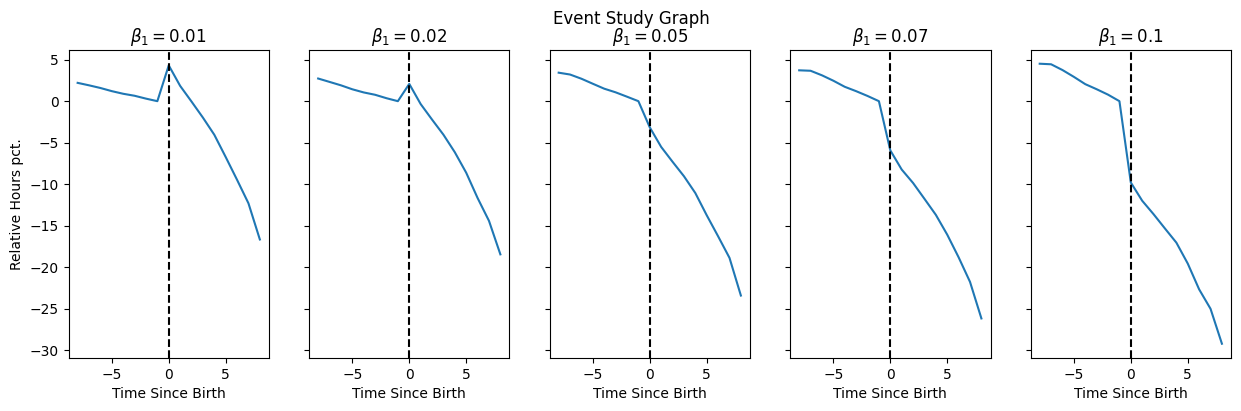

In [21]:
min_time = -8
max_time = 8
event_grid = np.arange(min_time, max_time + 1)

fig, axs = plt.subplots(1, len(simulations), figsize=(15, 4), sharey=True)
for i, (label, data) in enumerate(simulations.items()):
    for t, time in enumerate(event_grid):
        event_hours[t] = np.mean(data.h[time_since_birth == time])
    event_hours_rel = event_hours - event_hours[event_grid == -1]
    event_hours_pct = event_hours_rel / event_hours[event_grid == -1] * 100
    axs[i].plot(event_grid, event_hours_pct, label=label)
    axs[i].set_title(label)
    axs[i].set_xlabel('Time Since Birth')
    axs[i].axvline(x=0, color='k', ls='--')
axs[0].set_ylabel('Relative Hours pct.')
plt.suptitle('Event Study Graph')
plt.show()


# Problem 2

In [12]:
baseline.solve()
baseline.simulate()

In [9]:
model_taxed = DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3,'tau':0.101}) 

sim_taxed = model_taxed.sim
sol_taxed = model_taxed.sol
par_taxed = model_taxed.par
model_taxed.solve()
model_taxed.simulate()

In [13]:
labour_supply = np.mean(sim.h,axis=0)
real_wage = np.mean(baseline.wage_func(sim.k,np.arange(par.simT)),axis=0)
labour_supply_taxed = np.mean(sim_taxed.h,axis=0)
real_wage_taxed = np.mean(model_taxed.wage_func(sim_taxed.k,np.arange(par_taxed.simT)),axis=0)
hours_taxed = np.mean(sim_taxed.h,axis=0)
hours = np.mean(sim.h,axis=0)
#Marshall Elasticity
mae = (labour_supply_taxed-labour_supply)/(real_wage_taxed-real_wag)

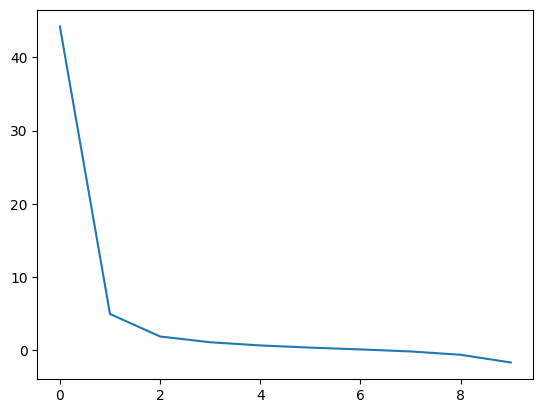

In [14]:
fig, axs = plt.subplots()
axs.plot(np.arange(10),mae)

# Problem 3
The spouse is introduced under `setup` in the `DynLaborFertModelClass` and is simply activated when the model is initialized

In [33]:
from DynLaborFertModel import DynLaborFertModelClass

In [34]:
baseline = model05.copy()
sim = baseline.sim
sol = baseline.sol
par = baseline.par

In [35]:
baseline = model05.copy()
sim = baseline.sim
sol = baseline.sol
par = baseline.par
baseline.solve()
baseline.simulate()

In [32]:
m_spouse=DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3,'theta':1.0}) 
m_spouse.setup(spouse=True)
par_sp = m_spouse.par
sol_sp = m_spouse.sol
sim_sp = m_spouse.sim

In [44]:
m_spouse=DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3,'theta':1.0}) 
m_spouse.setup(spouse=True)
par_sp = m_spouse.par
sol_sp = m_spouse.sol
sim_sp = m_spouse.sim
m_spouse.solve()
m_spouse.simulate()

In [36]:
cbl=baseline.cons_last(0.1,0.1,0.1)

In [37]:
csp=m_spouse.cons_last(0.1,0.1,0.1)

In [38]:
m_spouse.util(0.1,0.1,1)

-10.000013552618544

In [39]:
baseline.util(0.3,0.1,1) 

-3.333346885951877

In [41]:
m_spouse.solve()
m_spouse.simulate()

In [47]:
simulations = {
    r'No spouse': sim,
    r'Spouse': sim_sp,}

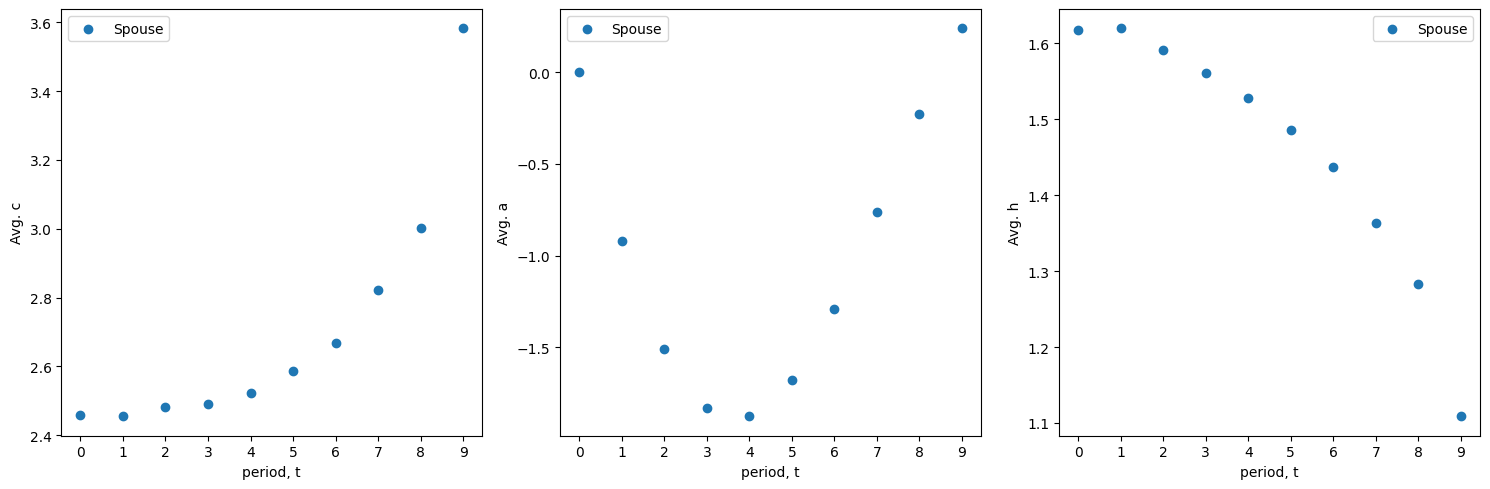

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, var in enumerate(('c', 'a', 'h')):
    for label, sim in simulations.items():
        axs[i].scatter(range(par.simT), np.mean(getattr(sim, var), axis=0), label=label)
    
    axs[i].set_xlabel('period, t')
    axs[i].set_ylabel(f'Avg. {var}')
    axs[i].set_xticks(range(par.simT))
    axs[i].legend()
    
fig.tight_layout()
plt.show()

# Problem 4
Childcare cost $\theta=0.05$ is introduced into the utility function

In [47]:
child_cost = baseline.copy(par={'theta':0.05})
ccsol = child_cost.sol
ccsim = child_cost.sim
ccpar = child_cost.par
child_cost.solve()
child_cost.simulate()

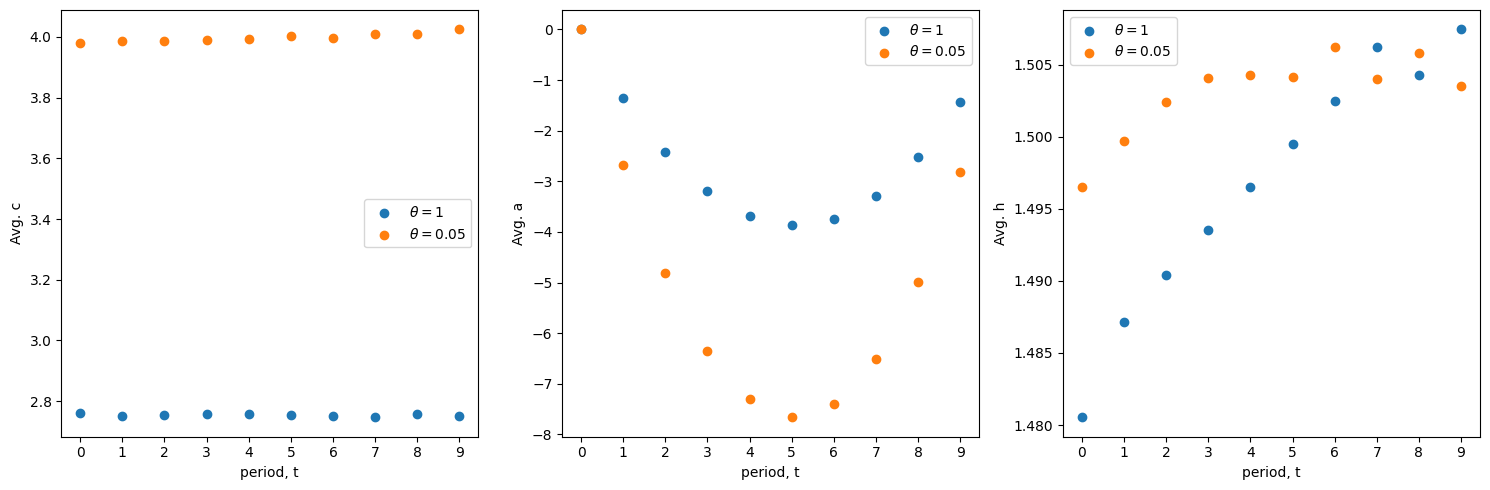

In [64]:
simulations = {
    r'$\theta=1$': sim,
    r'$\theta=0.05$': ccsim,
}
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, var in enumerate(('c', 'a', 'h')):
    for label, sim in simulations.items():
        axs[i].scatter(range(par.simT), np.mean(getattr(sim, var), axis=0), label=label)
    
    axs[i].set_xlabel('period, t')
    axs[i].set_ylabel(f'Avg. {var}')
    axs[i].set_xticks(range(par.simT))
    axs[i].legend()
    
fig.tight_layout()
plt.show()

# Question 6
Think of spouse arrival as a state:

$$S_t \in \{0,1\}\text{, where 1 means spouse present}$$
$$S_{t+1}= \begin{cases}
0 \sim p \\ 
n \sim 1-p
\end{cases}$$ 

If things are weird, maybe just accept it as is. It might just be numerical error, which is SUPER numerical error